In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        # print(os.path.join(dirname, filename))
        pass

print("Files loaded!")

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Files loaded!


In [2]:
import pandas as pd

train_df = pd.read_csv('/kaggle/input/mlp-en-cifar-100/cifar100_train.csv')


In [3]:
train_df.head()

,Image,Label
0,imgs/train/bos_taurus_s_000507.png,cattle
1,imgs/train/stegosaurus_s_000125.png,dinosaur
2,imgs/train/mcintosh_s_000643.png,apple
3,imgs/train/altar_boy_s_001435.png,boy
4,imgs/train/cichlid_s_000031.png,aquarium_fish


In [4]:
base_dir = '/kaggle/input/mlp-en-cifar-100/'

(32, 32, 3)


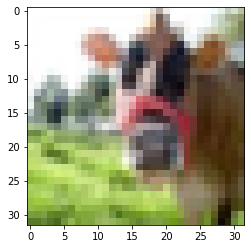

In [5]:
import matplotlib.pyplot as plt
from skimage.io import imread
%matplotlib inline
img = imread(base_dir+train_df['Image'][0])
plt.imshow(img)
print(img.shape)

In [6]:
x_train_and_val = np.zeros((50000,32,32,3),dtype='uint8')
for i, imgname in enumerate(train_df['Image'].values):
    x_train_and_val[i,] = np.array(imread(base_dir+imgname))


In [7]:
# Agarramos cada clase también
y_train_and_val = train_df['Label'].values
print(y_train_and_val.shape)
print(y_train_and_val[2])

(50000,)
apple


(32, 32, 3)

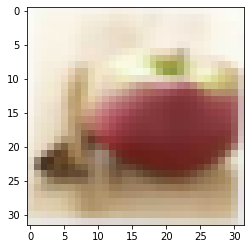

In [8]:
# Grafiquemos una imagen para ver que se esten agarrando bien
plt.imshow(x_train_and_val[2,])
x_train_and_val[2,].shape

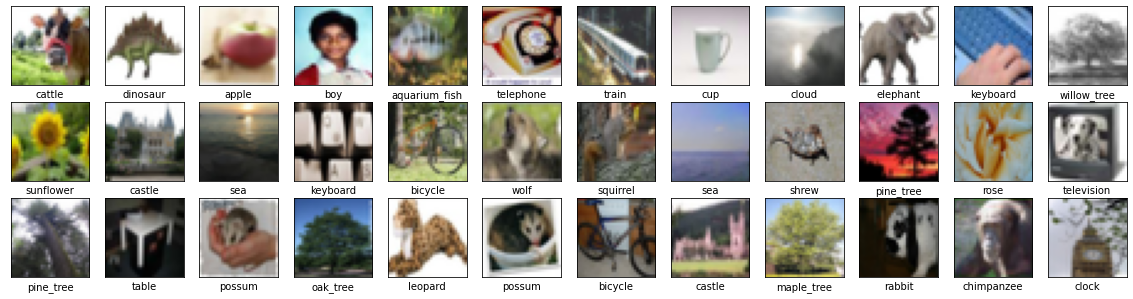

In [9]:
# Ploteo de 36 imagenes del dataset de train
def plot_images(x_train_and_val, y_train_and_val, N, n_rows=3, n_cols=12):
    fig = plt.figure(figsize=(20, 5))
    for i in range(N):
        ax = fig.add_subplot(n_rows, n_cols, i + 1, xticks=[], yticks=[])
        ax.set_xlabel(y_train_and_val[i])
        plt.imshow(x_train_and_val[i,])
plot_images(x_train_and_val, y_train_and_val, 36)


In [10]:
# Divido en train y validacion
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train_and_val, y_train_and_val,
                                                  test_size=0.05, 
                                                  random_state = 42,
                                                  stratify=y_train_and_val
                                                 )


In [11]:
# Agrego un flip a mi dataset de train
x_augmented_fliped = []
y_augmented_fliped = []
from PIL import Image, ImageOps
for i in range(len(x_train)):
    image = x_train[i]
    pil_img = Image.fromarray(image)
    pil = pil_img.transpose(Image.FLIP_LEFT_RIGHT)
    image = np.asarray(pil)
    x_augmented_fliped.append(image)
    y_augmented_fliped.append(y_train[i])

In [12]:
x_train = np.asarray([*x_train, *x_augmented_fliped])
y_train = np.asarray([*y_train, *y_augmented_fliped])

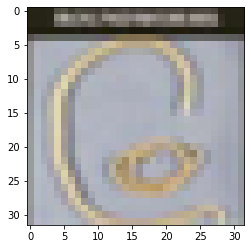

In [13]:
plt.imshow(x_train[40000-5])

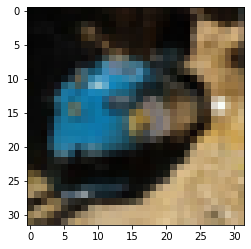

In [14]:
plt.imshow(x_train[-5])

In [15]:
# Realizo el One hot encoding de mis clases
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
enc_val = OneHotEncoder(handle_unknown='ignore')
y_categorical = enc.fit_transform(y_train.reshape(-1, 1))
y_val_categorical = enc_val.fit_transform(y_val.reshape(-1, 1))
print(y_train)
print(y_train.reshape(-1, 1))
print(y_categorical)
print(y_categorical[0,])
print(y_categorical[0,].shape)

['otter' 'shrew' 'cattle' ... 'cattle' 'tank' 'woman']
[['otter']
 ['shrew']
 ['cattle']
 ...
 ['cattle']
 ['tank']
 ['woman']]
  (0, 55)	1.0
  (1, 74)	1.0
  (2, 19)	1.0
  (3, 4)	1.0
  (4, 40)	1.0
  (5, 32)	1.0
  (6, 50)	1.0
  (7, 34)	1.0
  (8, 40)	1.0
  (9, 20)	1.0
  (10, 90)	1.0
  (11, 39)	1.0
  (12, 86)	1.0
  (13, 87)	1.0
  (14, 26)	1.0
  (15, 67)	1.0
  (16, 69)	1.0
  (17, 50)	1.0
  (18, 21)	1.0
  (19, 75)	1.0
  (20, 66)	1.0
  (21, 65)	1.0
  (22, 21)	1.0
  (23, 31)	1.0
  (24, 51)	1.0
  :	:
  (94975, 74)	1.0
  (94976, 74)	1.0
  (94977, 29)	1.0
  (94978, 36)	1.0
  (94979, 52)	1.0
  (94980, 95)	1.0
  (94981, 38)	1.0
  (94982, 64)	1.0
  (94983, 11)	1.0
  (94984, 54)	1.0
  (94985, 68)	1.0
  (94986, 13)	1.0
  (94987, 43)	1.0
  (94988, 56)	1.0
  (94989, 82)	1.0
  (94990, 75)	1.0
  (94991, 91)	1.0
  (94992, 65)	1.0
  (94993, 48)	1.0
  (94994, 86)	1.0
  (94995, 90)	1.0
  (94996, 72)	1.0
  (94997, 19)	1.0
  (94998, 85)	1.0
  (94999, 98)	1.0
  (0, 55)	1.0
(1, 100)


In [16]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, normalization, Dropout, Convolution2D, Conv2DTranspose, MaxPooling2D, Activation

# define the model
model = Sequential()
model.add(Convolution2D(64, (4, 4),padding="same", input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(32, (4, 4), padding="same", input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Convolution2D(16, (2, 2), padding="same", input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(normalization.BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(normalization.BatchNormalization())
model.add(Dense(100, activation='softmax'))
model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        3136      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        32800     
_________________________________________________________________
activation_2 (Activation)    (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 8)         1032      
_________________________________________________________________
activation_3 (Activation)    (None, 16, 16, 8)        

In [17]:
# Compilo modelo, asigno optimizador, funcion de costo, metrica a utilizar
# categorical_crossentropy no se cambia
# sparse categorical cross entropy ?
# Optimizador se cambia! Se puede instanciar un optimizador y variarle los parametros
# Metrics es para que el modelo me vaya guardando los datos
import keras
optimizer = keras.optimizers.SGD(
    learning_rate=0.003, momentum=0.9
)
model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy'],
)

In [18]:
from IPython.display import clear_output
class PlotLosses(keras.callbacks.Callback):
    def __init__(self, plot_interval=1, evaluate_interval=10, x_val=None, y_val_categorical=None):
        self.plot_interval = plot_interval
        self.evaluate_interval = evaluate_interval
        self.x_val = x_val
        self.y_val_categorical = y_val_categorical
    
    def on_train_begin(self, logs={}):
        print('Begin training')
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        self.acc = []
        self.val_acc = []
        self.logs = []
    
    def on_epoch_end(self, epoch, logs={}):
        if self.evaluate_interval is None:
            self.logs.append(logs)
            self.x.append(self.i)
            self.losses.append(logs.get('loss'))
            self.val_losses.append(logs.get('val_loss'))
            self.acc.append(logs.get('accuracy'))
            self.val_acc.append(logs.get('val_accuracy'))
            self.i += 1
        
        if (epoch%self.plot_interval==0):
            clear_output(wait=True)
            f, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(20,5))
            ax1.plot(self.x, self.losses, label="loss")
            ax1.plot(self.x, self.val_losses, label="val_loss")
            ax1.legend()

            ax2.plot(self.x, self.acc, label="accuracy")
            ax2.plot(self.x, self.val_acc, label="val_accuracy")
            ax2.legend()
            plt.show();
    
    def on_batch_end(self, batch, logs={}):
        if self.evaluate_interval is not None:
            if (batch%self.evaluate_interval==0):
                self.i += 1
                self.logs.append(logs)
                self.x.append(self.i)
                self.losses.append(logs.get('loss'))
                self.acc.append(logs.get('accuracy'))

                if self.x_val is not None:
                    score = self.model.evaluate(self.x_val, self.y_val_categorical, verbose=0)
                    self.val_losses.append(score[0])
                    self.val_acc.append(score[1])

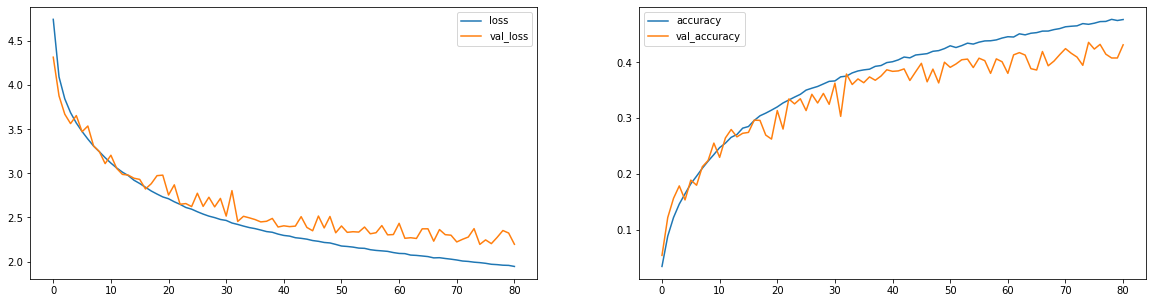

Epoch 82/120
 - 4s - loss: 1.9408 - accuracy: 0.4786 - val_loss: 2.2220 - val_accuracy: 0.4212
Epoch 83/120
 - 4s - loss: 1.9337 - accuracy: 0.4811 - val_loss: 2.1846 - val_accuracy: 0.4332


In [ ]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
checkpointer = ModelCheckpoint(filepath='model_best.hdf5', monitor='val_accuracy',verbose=0, save_best_only=True)
plot_losses = PlotLosses(plot_interval=5, evaluate_interval=None, x_val=x_val, y_val_categorical=y_val_categorical)
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, verbose=1, min_delta=1e-4)  
hist = model.fit(
    x_train, # cargo x traing
    y_categorical, # cargo y encoded
    batch_size=512, # asigno un batch size
    epochs=120,
    verbose=2,
    shuffle=True,
    validation_data=(x_val, y_val_categorical),
    callbacks=[plot_losses, checkpointer]
)

In [ ]:
# Cargo pesos optimos
model.load_weights('model_best.hdf5')
model.weights

In [ ]:
model.evaluate(x_val, y_val_categorical)

In [ ]:
test_df = pd.read_csv(base_dir + 'cifar100_test.csv')
# Treat the test data in the same way as training data. In this case, pull same columns.
x_test = np.zeros((10000, 32, 32, 3),dtype='uint8')
for i,imgname in enumerate(test_df['Image'].values):
    img = imread(base_dir + imgname)
    x_test[i, :, :, :] = img

test_df.head()


In [ ]:
test_df.head()


In [ ]:
# Use the model to make predictions
predicted_classes = np.argmax(model.predict(x_test),axis=1)
print(predicted_classes.shape)
print(predicted_classes[5])

In [ ]:
predicted_classes

In [ ]:
y_labels = enc.get_feature_names()
y_labels

In [ ]:
y_labels = [y.split('x0_')[-1] for y in enc.get_feature_names()]
y_labels

In [ ]:
y_labels[predicted_classes[6]]

In [ ]:
y_predictions = []
for i in range(len(predicted_classes)):
    y_predictions.append(y_labels[predicted_classes[i]])

In [ ]:
my_submission = pd.DataFrame(
    {
    'Image': test_df['Image'],
    'Label': y_predictions
    }
)
# you could use any filename. We choose submission here
my_submission.to_csv('submission.csv', index=False)

In [ ]:
from IPython.display import FileLink
FileLink(r'submission.csv')